<div dir="rtl" align="right">
בס"ד

# פתיחה

</div>


<div dir="rtl" align="right">
אומר הפתגם "להצלחה אבות רבים אך הכישלון יתום" ובמוסדות הלימוד הדבר נכון שבעתיים. אם נשאל תלמיד למה לא הצליח במבחן נשמע ודאי שהמורה אשם, אך אם הוא הצליח - ברור שזה בגלל ההשקעה שלו... וכמובן שכך גם מצד המורים, אם נשאל מורים של כיתות מוצלחות הם כנראה יתלו זאת בכשרונותיהם הדידקטים, אך אם נפגוש מורים של כיתות פחות.. נוכל לצפות לשמוע עד כמה הכיתה מופרעת וחסרת משמעת לימודית ועוד...    
</div>


<div dir="rtl" align="right">
רצינו לבדוק מי באמת צודק?<br> <b> ובקיצור שאלת המחקר שלנו היא:</b>  מהי מידת ההשפעה של המורה או המרצה על הצלחת תלמידיו?
</div>


<div dir="rtl" align="right">
הנתונים שלנו לקוחים מהאתר: https://analyse.kmi.open.ac.uk/open-dataset.  <br>
ומציגים נתונים על אלפי סטודנטים (ואם נדייק- כ28 אלף) שהשתתפו בשבעה קורסים דיגיטלים.<br>
    
<div dir="rtl" align="right"> 
<b>מה אנחנו מתכננים לעשות בתמצית?</b>  
    
    1. נייבא את מאגרי המידע הרלוונטים, נסביר ונסדר את מה שצריך  
    
    2. נסיר את הסטודנטים שפרשו במהלך הקורס

    3. נבודד את הסטודנטים החדשים מהמנוסים

    4. נחשב את אחוזי ההצלחה בקורסים השונים

    5. נמצא אילו גורמים משפיעים על הצלחת הסטודנטים

    6. נבדוק האם הם הגורמים להפרשי ההצלחות בקורסים

    7. נסכם ונסיק מסקנות

<div dir="rtl" align="right">
    
# 1. ייבוא וטיוב נתונים

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

<div dir="rtl" align="right">
טבלא מספר 1 - הטבלא המרכזית אותה ננתח. מכילה את המידע על הסטונדטים כולל האם עברו או נכשלו בקורס...

In [65]:
studentInfo = pd.read_csv('data/studentInfo.csv')

In [67]:
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [66]:
studentInfo.head(4)

code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   

   studied_credits disability final_result  
0              240          N         Pass  
1               60          N         Pass  
2               60          Y    Withdrawn  
3               60          N         Pass

<div dir="rtl" align="right">
העמודה הראשונה מתארת את שם הקורס והשניה את המועד בו הוא נפתח. נקבץ לפי קורסים על מנת לקבל מבט כללי על הטבלא שלפנינו

In [11]:
print('num of modules:', len(studentInfo['code_module'].unique()) )
print('num of presentations:', len(studentInfo['code_presentation'].unique()) )
print('num of student:', len(studentInfo['id_student'].unique()) )

num of modules: 7
num of presentations: 4
num of student: 28785


In [14]:
print('**Number of student per course**')
studentInfo.groupby(['code_module','code_presentation'])['id_student'].count()

**Number of student per course**


code_module  code_presentation
AAA          2013J                 383
             2014J                 365
BBB          2013B                1767
             2013J                2237
             2014B                1613
             2014J                2292
CCC          2014B                1936
             2014J                2498
DDD          2013B                1303
             2013J                1938
             2014B                1228
             2014J                1803
EEE          2013J                1052
             2014B                 694
             2014J                1188
FFF          2013B                1614
             2013J                2283
             2014B                1500
             2014J                2365
GGG          2013J                 952
             2014B                 833
             2014J                 749
Name: id_student, dtype: int64

<div dir="rtl" align="right">
ניתן לראות שנערכו 7 קורסים שונים, כאשר כל קורס נפתח מספר פעמים (נע בין 2 מועדים ל4). 

<div dir="rtl" align="right">
כעת נתחיל לטייב את הנתונים

<div dir="rtl" align="right">
 נסדר את עמודת code_presentation, כך שיהיה מובן באיזה תאריך התחיל כל קורס

In [70]:
studentInfo[['code_presentation']].drop_duplicates()

code_presentation
0                2013J
383              2014J
748              2013B
4752             2014B

In [71]:
studentInfo['code_presentation'] = studentInfo['code_presentation'].replace({'2013B':'2013 Feb',
                                                                            '2013J':'2013 Oct',
                                                                            '2014B':'2014 Feb',
                                                                            '2014J':'2014 Oct'})

In [72]:
studentInfo[['code_presentation']].drop_duplicates()

code_presentation
0             2013 Oct
383           2014 Oct
748           2013 Feb
4752          2014 Feb

<div dir="rtl" align="right">
נעבור לעמודת gender (על הדרך ננסה לקבל קצת הבנה והתרשמות מהדאתא שלנו, ולכן לא נשתמש רק בdrop duplicate אלא ב value counts)

In [80]:
studentInfo['gender'].value_counts().to_frame()

count
gender       
Male    17875
Female  14718

In [74]:
studentInfo['gender'] = studentInfo['gender'].replace({'M':'Male','F':'Female'})

In [76]:
studentInfo['gender'].value_counts().to_frame()

count
gender       
Male    17875
Female  14718

<div dir="rtl" align="right">
נעבור לעמודות הבאות

In [79]:
studentInfo['region'].value_counts().to_frame()

count
region                     
Scotland               3446
East Anglian Region    3340
London Region          3216
South Region           3092
North Western Region   2906
West Midlands Region   2582
South West Region      2436
East Midlands Region   2365
South East Region      2111
Wales                  2086
Yorkshire Region       2006
North Region           1823
Ireland                1184

In [78]:
studentInfo['highest_education'].value_counts().to_frame()

count
highest_education                 
A Level or Equivalent        14045
Lower Than A Level           13158
HE Qualification              4730
No Formal quals                347
Post Graduate Qualification    313

<div dir="rtl" align="right">
ישנן 5 רמות השכלה:
    
    1. השכלה תיכונית מלאה כולל מבחן A level

    2. השכלה תיכונית לא מלאה, לא כולל מבחן A level

    3. תואר ראשון או תעודות דומות

    4. ללא השכלה רשמית

    5. בעלי תואר מתקדם (שני שלישי וכד')

ניתן לראות שהרוב הגדול של הסטודנטים שהשתתפו בקורסים הם בעלי השכלה תיכונית (חלקית או מלאה) בלבד. בהמשך בעז"ה נבחן מה מידת ההשפעה של נתון זה על הצלחתם

In [58]:
studentInfo['imd_band'].value_counts().sort_index().to_frame()

count
imd_band       
0-10%      3311
10-20      3516
20-30%     3654
30-40%     3539
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536

<div dir="rtl" align="right">
מדד IMD (Index of Multiple Deprivation) מתאר את המצב הכלכלי-חברתי של הסטודנטים. ניתן לראות במבט ראשוני שיש יותר סטודנטים שהמצב הכלכלי בביתם בעייתי.

In [565]:
studentInfo['age_band'].value_counts().sort_index().to_frame()

count
age_band       
0-35      15554
35-55      6710
55<=        162

In [63]:
studentInfo['num_of_prev_attempts'].value_counts().sort_index().to_frame()

count
num_of_prev_attempts       
0                     28421
1                      3299
2                       675
3                       142
4                        39
5                        13
6                         4

<div dir="rtl" align="right">
העמודה הזו אמורה להציג את מספר הפעמים שהסטודנט ניסה את הקורס בעבר.  
<div dir="rtl" align="right">
נאמת את המספרים הללו על ידי בדיקה כמה פעמים כל סטודנט השתתף בקורס-

In [96]:
CourseCount = studentInfo.groupby('id_student')['code_module'].count()

In [97]:
CourseCount.value_counts()

code_module
1    25247
2     3293
3      221
4       23
5        1
Name: count, dtype: int64

<div dir="rtl" align="right">
ניתן לראות בקלות שאין ממש קשר בין המספרים המתארים את כמות הפעמים שסטודנטים השתתפו בקורסים, לבין המספרים בעמודת num_of_prev_attempts 
<div dir="rtl" align="right">
ננסה לבחון מה גרם לכך, על ידי התבוננות במספר סטודנטים נבחרים, לצורך העניין נתבונן על הסטודנטים עם המספרים הגדולים ביותר

In [106]:
CourseCount[CourseCount == 5]

id_student
584077    5
Name: code_module, dtype: int64

In [107]:
studentInfo[studentInfo['id_student'] == 584077]

code_module code_presentation  id_student gender                region  \
9587          CCC          2014 Feb      584077   Male  North Western Region   
11525         CCC          2014 Oct      584077   Male  North Western Region   
15596         DDD          2013 Oct      584077   Male  North Western Region   
16828         DDD          2014 Feb      584077   Male  North Western Region   
18139         DDD          2014 Oct      584077   Male  North Western Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
9587   A Level or Equivalent   20-30%     0-35                     0   
11525  A Level or Equivalent   20-30%     0-35                     1   
15596  A Level or Equivalent   20-30%     0-35                     0   
16828  A Level or Equivalent   20-30%     0-35                     1   
18139  A Level or Equivalent   20-30%     0-35                     2   

       studied_credits disability final_result  
9587               150          N    Withdrawn  
11525               90          N    Withdrawn  
15596              150          N    Withdrawn  
16828              150          N    Withdrawn  
18139               90          N    Withdrawn

In [101]:
studentInfo[studentInfo['num_of_prev_attempts'] == 6]

code_module code_presentation  id_student  gender                region  \
4903          BBB          2014 Feb      334981  Female          South Region   
14183         DDD          2013 Feb      987203  Female     South West Region   
16440         DDD          2014 Feb      286449  Female  East Midlands Region   
30035         FFF          2014 Oct     2630284  Female  East Midlands Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
4903   A Level or Equivalent   70-80%    35-55                     6   
14183     Lower Than A Level   20-30%    35-55                     6   
16440     Lower Than A Level   40-50%     0-35                     6   
30035  A Level or Equivalent    0-10%    35-55                     6   

       studied_credits disability final_result  
4903               120          N  Distinction  
14183              130          N    Withdrawn  
16440              120          N         Fail  
30035               90          N    Withdrawn

In [113]:
studentInfo[studentInfo['id_student'].isin([334981,987203,286449,2630284])]

code_module code_presentation  id_student  gender                region  \
4903          BBB          2014 Feb      334981  Female          South Region   
14183         DDD          2013 Feb      987203  Female     South West Region   
14596         DDD          2013 Oct      286449  Female  East Midlands Region   
16440         DDD          2014 Feb      286449  Female  East Midlands Region   
26167         FFF          2013 Oct     2630284  Female  East Midlands Region   
27677         FFF          2014 Feb     2630284  Female  East Midlands Region   
30035         FFF          2014 Oct     2630284  Female  East Midlands Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
4903   A Level or Equivalent   70-80%    35-55                     6   
14183     Lower Than A Level   20-30%    35-55                     6   
14596     Lower Than A Level   40-50%     0-35                     5   
16440     Lower Than A Level   40-50%     0-35                     6   
26167  A Level or Equivalent    0-10%    35-55                     4   
27677  A Level or Equivalent    0-10%    35-55                     5   
30035  A Level or Equivalent    0-10%    35-55                     6   

       studied_credits disability final_result  
4903               120          N  Distinction  
14183              130          N    Withdrawn  
14596              120          N    Withdrawn  
16440              120          N         Fail  
26167              180          N    Withdrawn  
27677              150          N    Withdrawn  
30035               90          N    Withdrawn

<div dir="rtl" align="right">
סיכום:
    
    1. עמודת num_of_prev_attempts סופרת את מספר הפעמים שהסטודנט השתתף בקורס במודל הזה (אם השתתף בקורסים ממודלים שונים - ימוספר בנפרד)
    
    2. כנראה שהקורסים הללו בוצעו בעוד מועדים שאין במאגר זה מידע עליהם.

    3. מומלץ לוודא שאכן היו מועדים נוספים, אחרת יש חשש שהנתונים בעמודה הזו משובשים... כרגע לצורך המטלה נניח שהנתונים תקינים ובהמשך נשתמש בהם בעז"ה 

<div dir="rtl" align="right">
עמודת studied_credits מתארת את מספר הנקודות שהסטודנט לומד בקורס זה. לצורך שאלת המחקר שלנו הנתון הזה לא רלוונטי ולכן נסיר את העמודה הזו ונתקדם

In [115]:
studentInfo.drop('studied_credits', axis = 1,inplace=True)

In [116]:
studentInfo.head(1)

code_module code_presentation  id_student gender               region  \
0         AAA          2013 Oct       11391   Male  East Anglian Region   

  highest_education imd_band age_band  num_of_prev_attempts disability  \
0  HE Qualification  90-100%     55<=                     0          N   

  final_result  
0         Pass

In [122]:
studentInfo['disability'].value_counts().to_frame()

count
disability       
No          29429
Yes          3164

In [120]:
studentInfo['disability'] = studentInfo['disability'].replace({'N':'No','Y':'Yes'})

In [123]:
studentInfo['disability'].value_counts().to_frame()

count
disability       
No          29429
Yes          3164

In [124]:
studentInfo['final_result'].value_counts().to_frame()

count
final_result       
Pass          12361
Withdrawn     10156
Fail           7052
Distinction    3024

<div dir="rtl" align="right">
העמודה הזו מתארת לנו את מידת ההצלחה של הסטודנטים בקורסים - האם נכשלו, עברו, עברו בהצטיינות, או שפרשו באמצע.
<div dir="rtl" align="right">
ננסה לקבל תמונת מצב בסיסית על אחוזי המעבר של הסטודנטים בקורסים השונים

In [126]:
palette = {"Pass": "green", "Fail": "red", "Distinction": "lightgreen","Withdrawn":'gray'}

g = sb.displot(kind="hist",
               data=studentInfo,
               x="final_result",
               hue="final_result",
               row="code_module",
               col="code_presentation",
               multiple="dodge",
               shrink=2,
               palette=palette)

# הוספת מספרים מעל העמודות
for ax in g.axes.flat:
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:  # להציג רק עמודות לא ריקות
            ax.text(patch.get_x() + patch.get_width()/2,
                    height,
                    int(height),
                    ha="center", va="bottom", fontsize=8)

plt.show()

<div dir="rtl" align="right">
ניתן לראות בבירור שיש קורסים בהם היחס בין הסטודנטים שעברו לאלו שנכשלו נשמר בין המועדים ויש שהיחסים השתנו. במהלך המחקר ננסה לראות מה גרם לשינוי 

<div dir="rtl" align="right">
טבלא נוספת שתשמש אותנו מתארת את תאריכי ההרשמה של הסטודנטים 

In [129]:
studentRegistration = pd.read_csv('data/studentRegistration.csv')

In [130]:
studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [168]:
studentRegistration.head()

code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
3                  NaN  
4                  NaN

<div dir="rtl" align="right">
התאריכים מתארים את מספר הימים שנרשם הסטודנט לפני פתיחת הקורס, ואת מספר הימים שעברו עד התאריך בו ביטל את רישומו (אם היה ביטול).
בטבלא הזו ניעזר על מנת לזהות את הטודנטים שפרשו במהלך הקורס 

<div dir="rtl" align="right">
    
# 2. הסרת הסטודנטים שפרשו במהלך הקורס

<div dir="rtl" align="right">
כרגע מעניין אותנו בעיקר מה משפיע על סיכויי ההצלחה של הסטודנטים בקורס, ולכן פחות מעניינים אותנו הסטודנטים שפרשו. לפרישה שלהם יכולות להיות המון סיבות, סיבות משפחתיות, כלכליות, רצון להחליף מקצוע ועוד, ולכן הם לא מלמדים על סטודנטים שכן נמצאים וכן לומדים. על כן נסיר אותם מהטבלאות אותן ננתח.   

<div dir="rtl" align="right">
יש לנו שני מקורות למציאת הסטודנטים שפרשו:
1. מטבלא studentinfo הסטודנטים שציונם הסופי הוא Withdrawn
2. מטבלאת studentRegistration סטודנטים שיש להם תאריך ביטול רישום 


In [233]:
#נמצא תחילה את כמות הפרישות מהטבלא הראשונה
len(studentInfo['id_student'][studentInfo['final_result'] == 'Withdrawn'])

10156

In [235]:
#כעת נמצא את הסטודנטים הפורשים, כדי להקל על ההשוואה בין הטבלאות.
Retiring_Students_info = studentInfo['id_student'][studentInfo['final_result'] == 'Withdrawn'].drop_duplicates()

In [194]:
len(Retiring_Students_info)

9155

In [210]:
Retiring_Students_Registration = studentRegistration['id_student'][studentRegistration['date_unregistration'].notnull()].drop_duplicates()

In [211]:
len(Retiring_Students_Registration)

9082

In [226]:
# נבדוק אלו סטודנטים לא חופפים
Retiring_Students_info[~Retiring_Students_info.isin(Retiring_Students_Registration)]

6315     2512349
6484      271047
6601      417978
7247      636660
7410      647876
          ...   
29753     694715
29978    2398260
30562     590248
32149     646891
32411     685028
Name: id_student, Length: 82, dtype: int64

In [227]:
Retiring_Students_Registration[~Retiring_Students_Registration.isin(Retiring_Students_info)]

2777     362907
2786     365288
3340     554243
14625    315082
14768    403052
15577    582954
24057    234004
24537    523777
25685    601640
Name: id_student, dtype: int64

In [218]:
9155-82+9

9082

In [228]:
# נמצא את הסטודנטים שביטלו הרשמה אך בכל זאת לא פרשו מהקורס וקיבלו ציון סופי
Suspicious_students = Retiring_Students_Registration[~Retiring_Students_Registration.isin(Retiring_Students_info)]
Suspicious_students.values

array([362907, 365288, 554243, 315082, 403052, 582954, 234004, 523777,
       601640])

In [231]:
studentInfo[studentInfo['id_student'].isin(Suspicious_students)].sort_values('id_student')

code_module code_presentation  id_student  gender                region  \
24057         FFF          2013 Oct      234004    Male      Yorkshire Region   
14625         DDD          2013 Oct      315082    Male  West Midlands Region   
2777          BBB          2013 Oct      362907  Female     South West Region   
2786          BBB          2013 Oct      365288  Female          South Region   
17792         DDD          2014 Oct      403052  Female      Yorkshire Region   
14768         DDD          2013 Oct      403052  Female      Yorkshire Region   
24537         FFF          2013 Oct      523777    Male          North Region   
3340          BBB          2013 Oct      554243  Female     South West Region   
6797          BBB          2014 Oct      554243  Female     South West Region   
15577         DDD          2013 Oct      582954    Male         London Region   
25685         FFF          2013 Oct      601640    Male         London Region   

           highest_education imd_band age_band  num_of_prev_attempts  \
24057  A Level or Equivalent   50-60%     0-35                     0   
14625  A Level or Equivalent   50-60%     0-35                     0   
2777      Lower Than A Level   20-30%    35-55                     2   
2786   A Level or Equivalent   70-80%     0-35                     0   
17792       HE Qualification   20-30%     0-35                     1   
14768       HE Qualification   20-30%     0-35                     0   
24537  A Level or Equivalent    0-10%    35-55                     1   
3340      Lower Than A Level   60-70%     0-35                     0   
6797      Lower Than A Level   60-70%     0-35                     1   
15577     Lower Than A Level    10-20     0-35                     0   
25685       HE Qualification   20-30%     0-35                     0   

      disability final_result  
24057         No         Fail  
14625         No         Fail  
2777          No         Fail  
2786          No         Fail  
17792         No         Fail  
14768         No         Fail  
24537         No         Fail  
3340          No         Fail  
6797          No         Fail  
15577         No         Fail  
25685         No         Fail

In [236]:
len(studentInfo[studentInfo['id_student'].isin(Suspicious_students)].sort_values('id_student'))

11

<div dir="rtl" align="right">
כל הסטודנטים שביטלו הרשמה אך עדיין קיבלו ציון בקורס נכשלו, כך שמסתבר שאכן הפסיקו ללמוד. 
<div dir="rtl" align="right">
כעת אחרי שראינו שיש לנו 10167 פרישות של סטודנטים מקורסים - נוכל להסיר אותם ולהתמקד בסטודנטים שנשארו. (יש 10156 פרישות מטבלאת הinfo ואני מדגיש פרישות ולא סטודנטים. ויש בנוסף עוד 8 סטודנטים שביטלו הרשמה אך עדיין קיבלו ציון. אותם 8 סטודנטים השתתפו ביחד ב11 קורסים, ניתן למצוא איזה מהקרוסים בדיוק הם ביטלו ואילו לא, אך הדיוק הזה לא שווה את המאמץ ופשוט נסיר את כל ה11 קורסים).  

In [239]:
#נחשב תחילה את כמות הסטודנטים שהשתתפו בקורסים
len(studentInfo)

32593

In [237]:
Students_for_drop1 = studentInfo[studentInfo['id_student'].isin(Suspicious_students)].sort_values('id_student').index

In [240]:
studentInfo.drop(Students_for_drop1,inplace = True)

In [243]:
Students_for_drop2 = studentInfo['id_student'][studentInfo['final_result'] == 'Withdrawn'].index

In [244]:
studentInfo.drop(Students_for_drop2,inplace = True)

In [247]:
len(studentInfo)

22426

In [248]:
# נוודא שלא טעינו
32593-22426

10167

<div dir="rtl" align="right">

# 3. הפרדת הסטודנטים החדשים והמנוסים

<div dir="rtl" align="right">
אני מעלה השערה מנסיון החיים שלי- הנסיון הראשון בקורס הוא משמעותית יותר קשה מהנסיונות הבאים. אם השערתי נכונה, יהיה יותר מדוייק להפריד בין הציונים בנסיונות הראשונים של הסטודנטים, לבין הציונים בנסיונות הבאים. ולכן נבחן השערה זו כבר עכשיו. נבחון מה כמה סטודנטים עברו בניסיון הראשון, השני השלישי וכו'. 


In [255]:
studentInfo['final_result'][studentInfo['num_of_prev_attempts']==0].value_counts()

final_result
Pass           11148
Fail            5724
Distinction     2857
Name: count, dtype: int64

Success rate on the 0th attempt


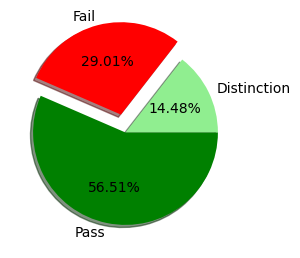

Success rate on the 1th attempt


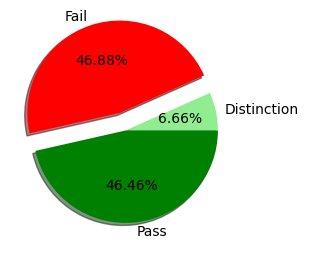

Success rate on the 2th attempt


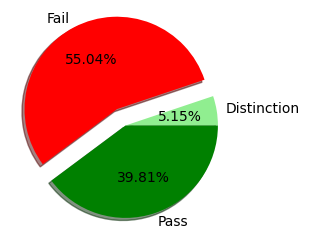

Success rate on the 3th attempt


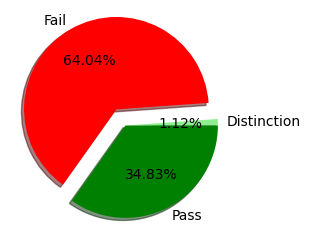

Success rate on the 4th attempt


Success rate on the 5th attempt


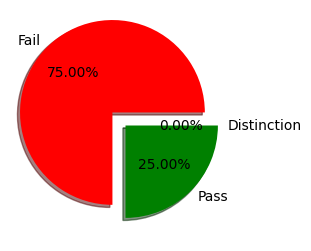

Success rate on the 6th attempt


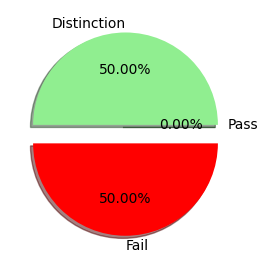

In [333]:
for i in range(0,7):
    
    print("Success rate on the {}th attempt".format(i))

    experience = studentInfo['final_result'][studentInfo['num_of_prev_attempts'] == i].value_counts().to_frame().sort_index()
    
    checking = pd.DataFrame(data= {'checking': 0}, index = ['Distinction','Fail','Pass'])
    experience1 = pd.merge(left = experience,right = checking, how = 'outer',left_index =True,right_index=True).fillna(0)#וא נתקע לי באמצע, כי לא בכל האפשרויות שהרצתי אותו היו סטודנטים מצטיינים. אז דאגתי שתמיד יהיה ערך כלשהו באיקס X
    xexperience = experience1['count']
    yexperience = experience1.index
    
    #print(experience1)
    plt.figure(figsize=(3,3))
    plt.pie(x = xexperience, labels= yexperience, autopct='%1.2f%%', colors = ["lightgreen","red","green"],explode=(0,0.2,0),shadow=True)
    plt.show()

<div dir="rtl" align="right">
מסתבר שטעיתי בגדול, האמת הפוכה ממה שחשבתי, דווקא בניסיון הראשון אחוזי ההצלחה גבוהים הרבה יותר (כ70 אחוז) ואילו בנסיונות הבאים הם קרובים לחצי.

<div dir="rtl" align="right">
אמנם עדיין נראה שיהיה יותר נכון לבצע את הניתוח והחישובים שלנו בנפרד. קודם כל על הנסיונות הראשונים, ואח"כ אם יהיה זמן - על הנסיונות הנוספים.

<div dir="rtl" align="right">
<b>ניתן להציע להסביר זאת כך</b>
סטודנטים מוכשרים עברו כבר בנסיון הראשון. מכאן ואילך ככל שעושים יותר נסיונות יש שתי מגמות הפוכות. מצד אחד, הסטודנטים כבר יותר מנוסים ו"משופשפים" כך שיש להם יותר סיכוי לעבור. מצד שני אם הם עד עכשיו לא עברו כנראה שיש להם קושי בקליטת החומר הזה. ונראה ממה שהצגנו שהמגמות מקזזות זו את זו וכך בכל הנסיונות המתקדמים אחוז הסטודנטים שעובר הינו דומה.

In [335]:
studentInfo0 = studentInfo[studentInfo['num_of_prev_attempts']==0]

In [336]:
studentInfo0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19729 entries, 0 to 32592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           19729 non-null  object
 1   code_presentation     19729 non-null  object
 2   id_student            19729 non-null  int64 
 3   gender                19729 non-null  object
 4   region                19729 non-null  object
 5   highest_education     19729 non-null  object
 6   imd_band              18942 non-null  object
 7   age_band              19729 non-null  object
 8   num_of_prev_attempts  19729 non-null  int64 
 9   disability            19729 non-null  object
 10  final_result          19729 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.8+ MB


<div dir="rtl" align="right">
נשארנו עם כעשרים אלף סטודנטים, עליהם נחשב את שיעורי ההצלחה בקורסים. 

<div dir="rtl" align="right">

# 4. אחוזי ההצלחה בקורסים השונים

In [380]:
studentInfo0.groupby(['code_module','code_presentation','final_result'])[['id_student']].count()

id_student
code_module code_presentation final_result            
AAA         2013 Oct          Distinction           20
                              Fail                  45
                              Pass                 258
            2014 Oct          Distinction           23
                              Fail                  39
...                                                ...
GGG         2014 Feb          Fail                 234
                              Pass                 323
            2014 Oct          Distinction          123
                              Fail                 171
                              Pass                 303

[66 rows x 1 columns]

In [381]:
#כדי לחשב את אחוז התלמידים שעברו את הקורסים נחשב כמה השתתפו בכל קורס, כמה נכשלו, ונסיק מה אחוז העוברים מבין כלל הסטודנטים
#תחילה נחשב את כמות הסטודנטים בכל קורס
studentInfo0_countall = studentInfo0.groupby(['code_module','code_presentation'])[['id_student']].count()
studentInfo0_countall.rename({'id_student':'count_all'},axis=1,inplace = True)

In [382]:
#כעת נחשב כמה סטודנטים נכשלו
studentInfo0_countfails = studentInfo0[studentInfo0['final_result'] == 'Fail'].groupby(['code_module','code_presentation'])[['id_student']].count()
studentInfo0_countfails.rename({'id_student':'count_fails'},axis=1,inplace = True)

In [383]:
#נחבר בין הטבלאות ונחשב את אחוז ההצלחה
student_success_percent = pd.merge(studentInfo0_countfails,studentInfo0_countall,left_index=True,right_index=True)
student_success_percent

count_fails  count_all
code_module code_presentation                        
AAA         2013 Oct                    45        323
            2014 Oct                    39        269
BBB         2013 Feb                   339       1022
            2013 Oct                   404       1364
            2014 Feb                   301        937
            2014 Oct                   331       1371
CCC         2014 Feb                   375       1038
            2014 Oct                   350       1300
DDD         2013 Feb                   265        703
            2013 Oct                   330       1068
            2014 Feb                   177        584
            2014 Oct                   260        958
EEE         2013 Oct                   200        809
            2014 Feb                   144        471
            2014 Oct                   172        827
FFF         2013 Feb                   307        946
            2013 Oct                   408       1411
            2014 Feb                   286        861
            2014 Oct                   292       1302
GGG         2013 Oct                   294        886
            2014 Feb                   234        682
            2014 Oct                   171        597

In [384]:
student_success_percent['success_percent'] = 100 - student_success_percent['count_fails']/student_success_percent['count_all']*100
#נעגל את המספרים
student_success_percent['success_percent'] = student_success_percent['success_percent'].round(2)
student_success_percent.head()

count_fails  count_all  success_percent
code_module code_presentation                                         
AAA         2013 Oct                    45        323            86.07
            2014 Oct                    39        269            85.50
BBB         2013 Feb                   339       1022            66.83
            2013 Oct                   404       1364            70.38
            2014 Feb                   301        937            67.88

In [385]:
#נוסיף את הסימן אחוז על מנת להכין טבלא ברורה שניתן לייצא
student_success_percent['success_percent%'] = student_success_percent['success_percent'].astype(str) + '%'
student_success_percent[['count_fails','count_all','success_percent%']]

count_fails  count_all success_percent%
code_module code_presentation                                         
AAA         2013 Oct                    45        323           86.07%
            2014 Oct                    39        269            85.5%
BBB         2013 Feb                   339       1022           66.83%
            2013 Oct                   404       1364           70.38%
            2014 Feb                   301        937           67.88%
            2014 Oct                   331       1371           75.86%
CCC         2014 Feb                   375       1038           63.87%
            2014 Oct                   350       1300           73.08%
DDD         2013 Feb                   265        703            62.3%
            2013 Oct                   330       1068            69.1%
            2014 Feb                   177        584           69.69%
            2014 Oct                   260        958           72.86%
EEE         2013 Oct                   200        809           75.28%
            2014 Feb                   144        471           69.43%
            2014 Oct                   172        827            79.2%
FFF         2013 Feb                   307        946           67.55%
            2013 Oct                   408       1411           71.08%
            2014 Feb                   286        861           66.78%
            2014 Oct                   292       1302           77.57%
GGG         2013 Oct                   294        886           66.82%
            2014 Feb                   234        682           65.69%
            2014 Oct                   171        597           71.36%

In [386]:
#כעת ננסה להציג את זה בצורה גרפית, על מנת לקבל תמונת מצב יותר ברורה על היחסים בין הקורסים השונים
#תחילה נהפוך את האינדקסים לעמודות
student_success_percent.reset_index(inplace=True)

In [387]:
student_success_percent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        22 non-null     object 
 1   code_presentation  22 non-null     object 
 2   count_fails        22 non-null     int64  
 3   count_all          22 non-null     int64  
 4   success_percent    22 non-null     float64
 5   success_percent%   22 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.2+ KB


<div dir="rtl" align="right">
כעת ניגש לייצר את גרף שיציג את שיעורי ההצלחות של הסטדנטים.
<div dir="rtl" align="right">
נרצה לבחון לכל מודל (ובעצם לכל מרצה) מהו אחוז התלמידים שעברו את הקורס אצלו בכל מועד. ולכן ציר האיקס שלנו יהיה עמודת code_presentation . הבעיה היא שהערכים בעמודה הזו הינם טקסטואלים ולכן כדי שידע לסדר אותם בסדר הנכון יש להמיר אותם קודם לערכים קטגורים.   

In [388]:
student_success_percent['code_presentation'] = pd.Categorical(
    student_success_percent['code_presentation'],
    categories=["2013 Feb", "2013 Oct", "2014 Feb", "2014 Oct"],
    ordered=True
)

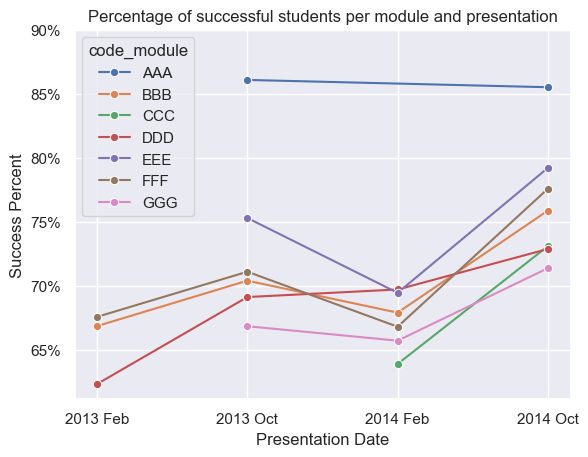

In [389]:
#כעת נייצר lineplot
sb.set_theme()
sb.lineplot(data = student_success_percent,x='code_presentation',y='success_percent',hue = 'code_module',marker='o')
plt.title('Percentage of successful students per module and presentation')
plt.yticks([65,70,75,80,85,90],['65%','70%','75%','80%','85%','90%'])
plt.ylabel('Success Percent')
plt.xlabel('Presentation Date')
plt.show()

<div dir="rtl" align="right">
ניתן להסיק מהגרף הזה כמה עובדות מעניינות:
    
    1. נראה שבאופן יחסי שיעורי ההצלחה במודלים השונים הם קרובים מאוד, ברמה של סטיה עד 10% בלבד. למעט מודל אחד שנראה שהיה מוצלח במיוחד - מודל AAA.
    2. עם זאת, באופן עקבי יחסית אחוז התלמידים שעברו את קורס EEE הינו יחסית גבוה, ואילו אחוז העוברים את קורסים CCC וGGG הוא יחסית נמוך. 
    3. ניתן לראות שבקורס שהתחיל בפבואר 2014 אחוז התלמידים העוברים הינו קטן יותר משאר הקורסים. גם זאת עובדה מעניינת אךאינה קשורה לשאלת המחקר שלנו ולכן לא נעסוק בה כרגע.
    

<div dir="rtl" align="right">
כעת נעשה אותו דבר על הסטודנטים שעברו רק בנסיון השני והלאה

In [396]:
studentInfo1 = studentInfo[studentInfo['num_of_prev_attempts']>0]
studentInfo1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2697 entries, 395 to 32580
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           2697 non-null   object
 1   code_presentation     2697 non-null   object
 2   id_student            2697 non-null   int64 
 3   gender                2697 non-null   object
 4   region                2697 non-null   object
 5   highest_education     2697 non-null   object
 6   imd_band              2609 non-null   object
 7   age_band              2697 non-null   object
 8   num_of_prev_attempts  2697 non-null   int64 
 9   disability            2697 non-null   object
 10  final_result          2697 non-null   object
dtypes: int64(2), object(9)
memory usage: 252.8+ KB


In [405]:
# יש לנו כאלפיים שבע מאות סטודנטים שעברו רק בניסיון השני והלאה
#נמיין לפי קורסים
studentInfo1.groupby(['code_module','code_presentation','final_result'])\
    [['id_student']].count().head(10)

id_student
code_module code_presentation final_result            
AAA         2014 Oct          Distinction            1
                              Fail                   7
                              Pass                  22
BBB         2013 Feb          Distinction           14
                              Fail                 120
                              Pass                 106
            2013 Oct          Distinction           16
                              Fail                 114
                              Pass                  96
            2014 Feb          Distinction           15

In [406]:
#כדי לחשב את אחוז התלמידים שעברו את הקורסים נחשב כמה השתתפו בכל קורס, כמה נכשלו, ונסיק מה אחוז העוברים מבין כלל הסטודנטים
#תחילה נחשב את כמות הסטודנטים בכל קורס
studentInfo1_countall = studentInfo1.groupby(['code_module','code_presentation'])[['id_student']].count()
studentInfo1_countall.rename({'id_student':'count_all'},axis=1,inplace = True)
#כעת נחשב כמה סטודנטים נכשלו
studentInfo1_countfails = studentInfo1[studentInfo1['final_result'] == 'Fail'].groupby(['code_module','code_presentation'])[['id_student']].count()
studentInfo1_countfails.rename({'id_student':'count_fails'},axis=1,inplace = True)
#נחבר בין הטבלאות ונחשב את אחוז ההצלחה
student_success_percent1 = pd.merge(studentInfo1_countfails,studentInfo1_countall,left_index=True,right_index=True)
student_success_percent1['success_percent'] = 100 - student_success_percent1['count_fails']/student_success_percent1['count_all']*100
#נעגל את המספרים
student_success_percent1['success_percent'] = student_success_percent1['success_percent'].round(2)
student_success_percent1

count_fails  count_all  success_percent
code_module code_presentation                                         
AAA         2014 Oct                     7         30            76.67
BBB         2013 Feb                   120        240            50.00
            2013 Oct                   114        226            49.56
            2014 Feb                    95        186            48.92
            2014 Oct                    59        171            65.50
CCC         2014 Oct                    56        121            53.72
DDD         2013 Feb                    96        168            42.86
            2013 Oct                    95        186            48.92
            2014 Feb                    82        154            46.75
            2014 Oct                   103        197            47.72
EEE         2014 Feb                    20         50            60.00
            2014 Oct                    26         55            52.73
FFF         2013 Feb                   114        257            55.64
            2013 Oct                   102        194            47.42
            2014 Feb                    98        177            44.63
            2014 Oct                   101        208            51.44
GGG         2014 Feb                    21         51            58.82
            2014 Oct                     8         26            69.23

In [414]:
#כעת ננסה להציג את זה בצורה גרפית, על מנת לקבל תמונת מצב יותר ברורה על היחסים בין הקורסים השונים
#תחילה נהפוך את האינדקסים לעמודות
student_success_percent1.reset_index(inplace=True)
# נמיר את תאריכי התחלת הקורס למטקסט לקטגוריה
student_success_percent1['code_presentation'] = pd.Categorical(
    student_success_percent1['code_presentation'],
    categories=["2013 Feb", "2013 Oct", "2014 Feb", "2014 Oct"],
    ordered=True
)

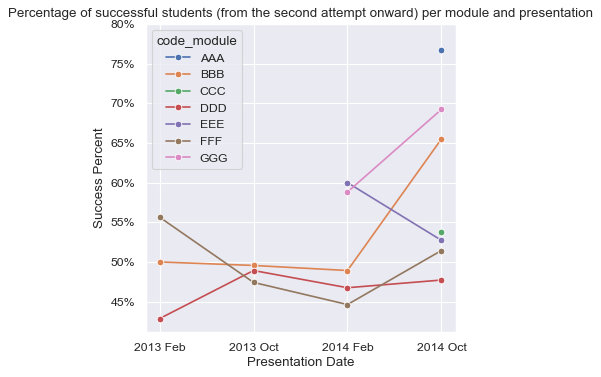

In [417]:
#כעת נייצר lineplot
plt.figure(figsize=(5,5),dpi = 80)
sb.set_theme()
sb.lineplot(data = student_success_percent1,x='code_presentation',y='success_percent',hue = 'code_module',marker='o')
plt.title('Percentage of successful students (from the second attempt onward) per module and presentation')
plt.yticks([45,50,55,60,65,70,75,80],['45%','50%','55%','60%','65%','70%','75%','80%'])
plt.ylabel('Success Percent')
plt.xlabel('Presentation Date')
plt.show()

<div dir="rtl" align="right">
גם מהגרף הזה ניתן להסיק עובדות מעניינות:
    
    1. לא בכל המועדים בכלל השתתפו סטודנטים כנסיון חוזר, ובנוסף בכלל כמות הסטודנטים שעברו רק מהנסיון השני והלאה הינה קטנה משמעותית יותר מאלו שעברו בנסיון הראשון (אלפיים שבע מאות לעומת כמעט עשרים אלף) ולכן בהכרח המסקנות שנוכל לנסות להסיק מכח הגרף הזה יהיו פחות ודאיות.
    2. גם כאן אחוז הסטודנטים שעברו את קורס AAA הוא הגבוה ביותר
    3. עם זאת כאן אחוז העוברים את קורס GGG הוא דווקא יחסית גבוהה. (אמנם יש לסייג שיש רק 77 סטודנטים שניגשו יותר מפעם אחת לקורס הזה, כך שקשה להסיק מכאן מסקנות)
    4. אצל הסטודנטים הללו לא רואים ירידה משמעותית בקורס שהתחיל בתאריך פבואר 2014

<div dir="rtl" align="right">

# 5. הגורמים המשפיעים על הצלחת הסטודנטים

<div dir="rtl" align="right">
ראינו שבקורסים מסויימים או במועדים מסויימים אחוז התלמידים שעבר את הקורס היה גבוה יותר, ברצוננו לבחון האם אנחנו יכולים להצביע על הסיבה שגרמה לזה.
<div dir="rtl" align="right">
שלב ראשון - נבחן אילו גורמים משפיעים על הצלחת הסטודנטים לעבור את הקורסים. בשלב הבא נבחן האם ניתן להסביר על ידי הגורמים הללו את השינויים שראינו.

<div dir="rtl" align="right">
טבלא studentInfo מכילה נתונים רבים על הסטודנטים, נעבור תחילה אחד אחד ונבחן האם יש לו השפעה על מידת ההצלחה של הסטודנט בקורס?

In [418]:
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22426 entries, 0 to 32592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           22426 non-null  object
 1   code_presentation     22426 non-null  object
 2   id_student            22426 non-null  int64 
 3   gender                22426 non-null  object
 4   region                22426 non-null  object
 5   highest_education     22426 non-null  object
 6   imd_band              21551 non-null  object
 7   age_band              22426 non-null  object
 8   num_of_prev_attempts  22426 non-null  int64 
 9   disability            22426 non-null  object
 10  final_result          22426 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.1+ MB


In [442]:
#עמודת מין
#נקבץ את הנתונים לפי מין וציון
gender_effect = studentInfo.groupby(['final_result','gender'])[['id_student']].count()
gender_effect.rename({'id_student':'count'},axis=1,inplace=True)
gender_effect.reset_index(inplace=True)

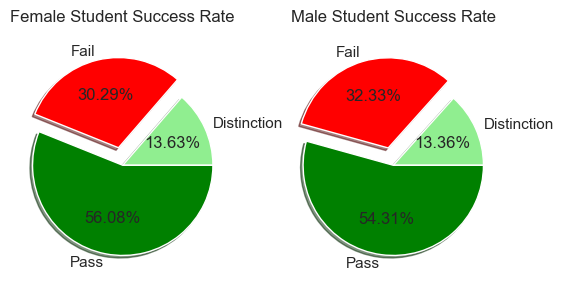

In [446]:
#נייצר גרפים
#כדי לחסוך את הכתיבה החוזרת נשתמש בלולאה שממיינת ומציגה את הגרף עבור כל מין בנפרד
values = gender_effect['gender'].unique()
for i in range(0,len(values)):
    plt.subplot(1,len(values),i+1)

    filter = (gender_effect['gender'] == values[i])
    xcount = gender_effect[filter]['count']
    lab = gender_effect[filter]['final_result']

    plt.title('{} Student Success Rate'.format(values[i]),y = 1.1)
    plt.pie(x=xcount,labels=lab, autopct='%1.2f%%', colors = ["lightgreen","red","green"],explode=(0,0.2,0),shadow=True)

In [477]:
#עמודת אזור
#נקבץ את הנתונים לפי אזור וציון
region_effect = studentInfo.groupby(['region','final_result'])[['id_student']].count()
region_effect.rename({'id_student':'count'},axis=1,inplace=True)
region_effect.reset_index(inplace=True)

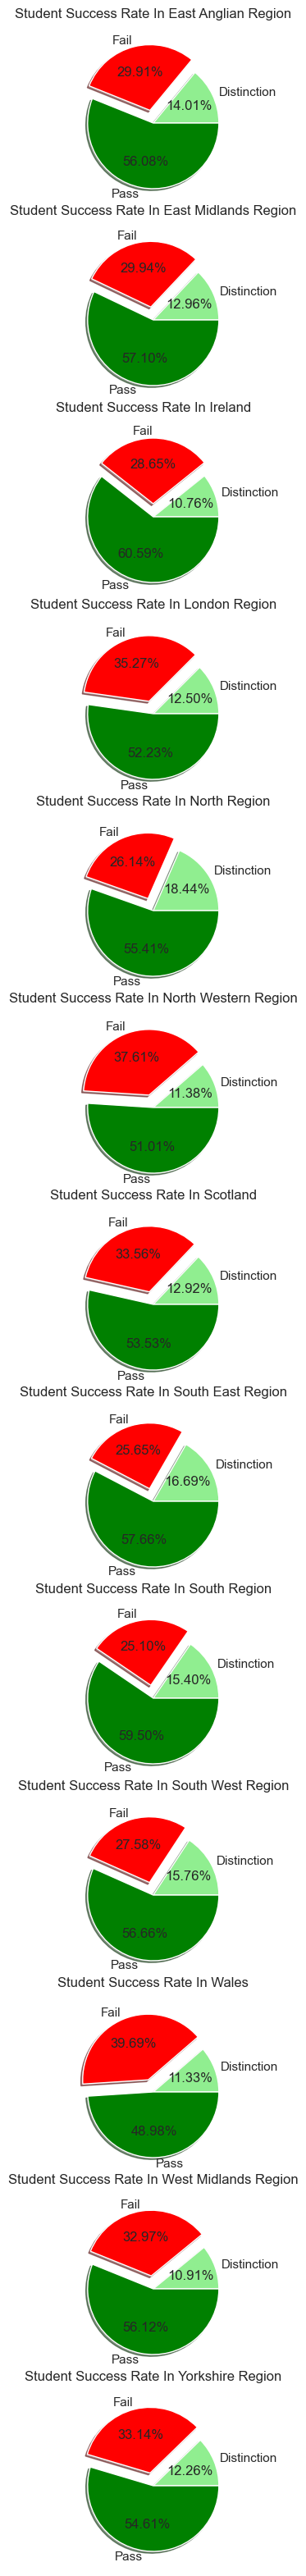

In [479]:
#נייצר גרפים
#כדי לחסוך את הכתיבה החוזרת נשתמש בלולאה שממיינת ומציגה את הגרף עבור כל אזור בנפרד
plt.figure(figsize=(40,40))
values = region_effect['region'].unique()
for i in range(0,len(values)):
    plt.subplot(len(values),1,i+1)

    filter = (region_effect['region'] == values[i])
    xcount = region_effect[filter]['count']
    lab = region_effect[filter]['final_result']

    plt.title('Student Success Rate In {}'.format(values[i]),y = 1.1)
    plt.pie(x=xcount,labels=lab, autopct='%1.2f%%', colors = ["lightgreen","red","green"],explode=(0,0.2,0),shadow=True)

In [483]:
#עמודת השכלה
#נקבץ את הנתונים לפי רמת השכלה וציון
highest_education_effect = studentInfo.groupby(['highest_education','final_result'])[['id_student']].count()
highest_education_effect.rename({'id_student':'count'},axis=1,inplace=True)
highest_education_effect.reset_index(inplace=True)

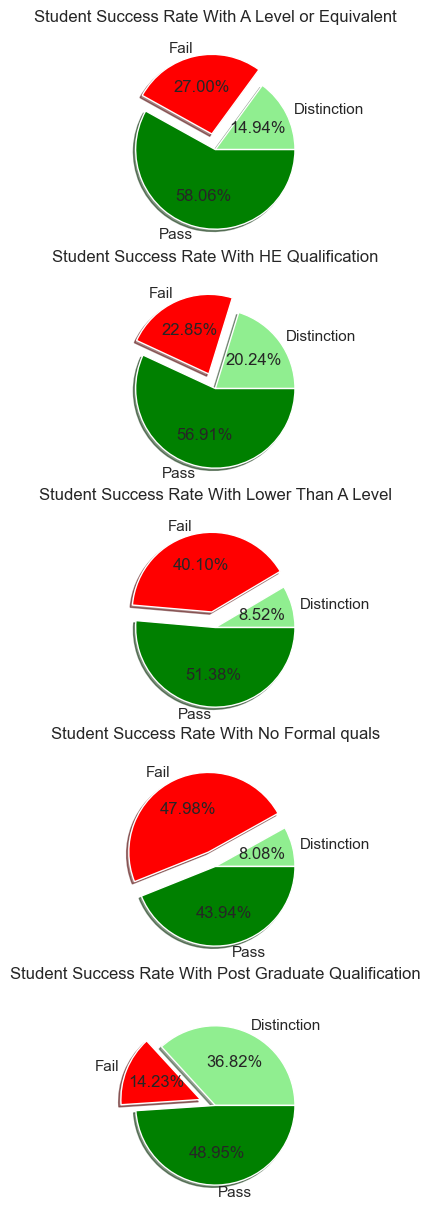

In [518]:
#נייצר גרפים
#כדי לחסוך את הכתיבה החוזרת נשתמש בלולאה שממיינת ומציגה את הגרף עבור כל רמת השכלהר בנפרד
plt.figure(figsize=(15,15))
values = highest_education_effect['highest_education'].unique()
for i in range(0,len(values)):
    plt.subplot(len(values),1,i+1)

    filter = (highest_education_effect['highest_education'] == values[i])
    xcount = highest_education_effect[filter]['count']
    lab = highest_education_effect[filter]['final_result']

    plt.title('Student Success Rate With {}'.format(values[i]),y = 1.1)
    plt.pie(x=xcount,labels=lab, autopct='%1.2f%%', colors = ["lightgreen","red","green"],explode=(0,0.2,0),shadow=True)

In [487]:
#נציג את זה בצורה נוספת
#נחשב את אחוז התלמידים שנכשלו, ועל ידי זה את כמות התלמידים שעברו לפי כל רמת השכלה
# hee = highest_education_effect
hee_count_fails = studentInfo[studentInfo['final_result'] == 'Fail'].groupby(['highest_education','final_result'])[['id_student']].count()
hee_count_fails.rename({'id_student':'count_fails'},axis=1,inplace=True)

hee_count_all = studentInfo.groupby(['highest_education',])[['id_student']].count()
hee_count_all.rename({'id_student':'count_all'},axis=1,inplace=True)

hee = pd.merge(hee_count_fails,hee_count_all,left_index=True,right_index=True)

In [489]:
#נחשב את אחוז התלמידים שעברו
hee['success_percent'] = 100 - hee['count_fails']/hee['count_all']*100
hee['success_percent'] = round( hee['success_percent'],2)
hee.reset_index(inplace=True)

In [497]:
# נמיר את הערכים בעמודת ההשכלה מטקסט לקטגוריה על מנת שנוכל לבחור את הסדר בו יוצגו תחת הגרף
hee['highest_education'].unique()

['A Level or Equivalent', 'HE Qualification', 'Lower Than A Level', 'No Formal quals', 'Post Graduate Qualification']
Categories (5, object): ['No Formal quals' < 'Lower Than A Level' < 'A Level or Equivalent' < 'HE Qualification' < 'Post Graduate Qualification']

In [498]:
hee['highest_education'] = pd.Categorical(
    hee['highest_education'],
    categories=['No Formal quals', 'Lower Than A Level', 'A Level or Equivalent', 'HE Qualification','Post Graduate Qualification'],
    ordered=True)

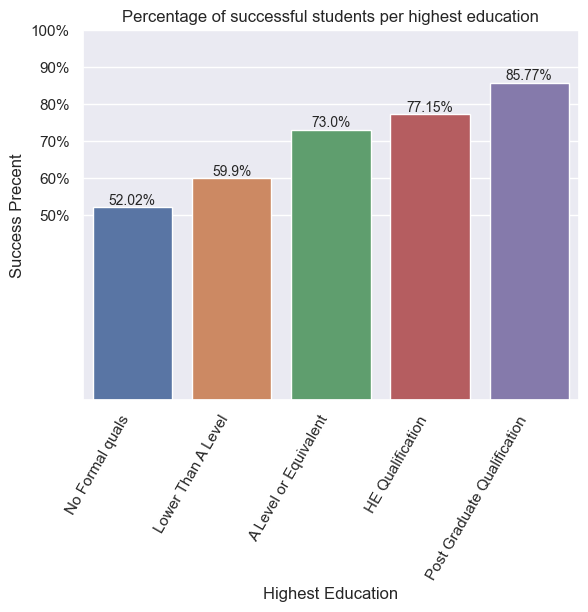

In [502]:
sb.barplot(
    x='highest_education', 
    y='success_percent', 
    hue = 'highest_education',
    data=hee)
for i,j in zip(hee['highest_education'],hee['success_percent']):
    plt.annotate(str(j)+'%',xy=(i,j),ha="center", va="bottom", size=10)
plt.ylabel('Success Precent')
plt.xlabel('Highest Education')
plt.yticks([50,60,70,80,90,100],['50%','60%','70%','80%','90%','100%'])
plt.xticks(rotation=60, ha='right')
plt.title('Percentage of successful students per highest education')
plt.show()

In [504]:
# ננסה לבדוק האם סטודנטים שהם מתוכנני מראש יותר מצליחים? נבדוק האם יש קשר בין התאריך בו נרשמו לקורס לבין הציון הסופי?
studentRegistration.head()

code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
3                  NaN  
4                  NaN

In [509]:
planning_effect = pd.merge(studentInfo,studentRegistration,how= 'inner', on = ['code_module','id_student'])
planning_effect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23338 entries, 0 to 23337
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           23338 non-null  object 
 1   code_presentation_x   23338 non-null  object 
 2   id_student            23338 non-null  int64  
 3   gender                23338 non-null  object 
 4   region                23338 non-null  object 
 5   highest_education     23338 non-null  object 
 6   imd_band              22435 non-null  object 
 7   age_band              23338 non-null  object 
 8   num_of_prev_attempts  23338 non-null  int64  
 9   disability            23338 non-null  object 
 10  final_result          23338 non-null  object 
 11  code_presentation_y   23338 non-null  object 
 12  date_registration     23326 non-null  float64
 13  date_unregistration   744 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 2.5+ MB


In [510]:
planning_effect['date_registration'] =  abs(planning_effect['date_registration'])

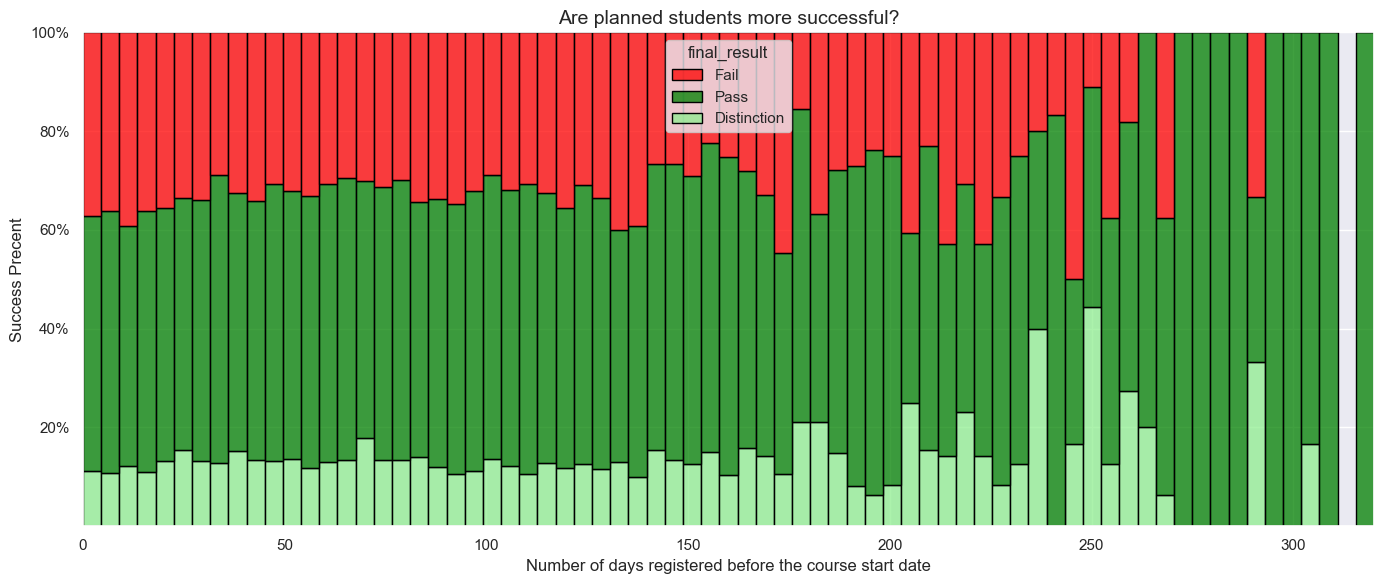

In [523]:
planning_effect['final_result'] = pd.Categorical(
    planning_effect['final_result'],
    categories=['Fail','Pass','Distinction'],
    ordered=True
)

plt.figure(figsize=(14,6))

sns.histplot(
    data=planning_effect,
    x='date_registration',
    hue='final_result', 
    multiple='fill', 
    palette = ["red","green","lightgreen"],
    edgecolor='black'
)

plt.title("Are planned students more successful?", fontsize=14)
plt.xlabel("Number of days registered before the course start date")
plt.ylabel("Success Precent")
plt.yticks([0.2,0.4,0.6,0.8,1],labels=['20%','40%','60%','80%','100%'])
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [525]:
# ניתן לראות שהסטונדנטים שנרשמו יותר מ270 יום לפני תחילת הקורס הצליחו באחוזים גבוהים. נבדוק מה כמותם כדי לוודא מה רמת האמינות של נתון זה
len(planning_effect[planning_effect['date_registration'] >270])

23

<div dir="rtl" align="right">
<b> סיכום הגרף <b>
    
    1. ניתן לראות שאין כמעט השפעה בין התאריך בו הסטודנטים נרשמו לקורס לבין מידת ההצלחה בו. כלומר סטונדט מתוכנן מראש לאו דווקא יצליח יותר
    2. אמנם מבין הסטודנטים שנרשמו יותר מ270 יום לפני הקורס אחוזי ההצלחה היו גבוהים במיוחד, אך קשה לסמוך על הנתונים הללו, מאחר ויש רק 23 סטודנטים כאלו מתוך כ23 אלף...


<div dir="rtl" align="right">
    
# 6. בחינה האם הם הגורמים להפרשי ההצלחות בקורסים?

<div dir="rtl" align="right">
בדקנו עד כה 4 נתונים נוספים על הסטודנטים האם הם משפיעים על מידת ההצלחה בקורסים. ראינו שהמין ותאריך ההרשמה כמעט ולא השפיעו, מנגד איזור המגורים ובאופן משמעותי אף יותר רמת ההשכלה כן השפיעו. כעת, היה ראוי להמשיך לעבור כך על כל הנתונים שידועים לנו על הסטודנטים, אך מחמת קוצר הזמן אני אוותר על זה כרגע ונסתפק במה שראינו.
<div dir="rtl" align="right">
כעת ננסה לבחון האם ניתן לתלות את השינויים במידת ההצלחה במודלים השונים של הקורסים בנתונים אלו או שהמשפיע העיקרי הוא המרצה (או תוכן הקורס)?
<div dir="rtl" align="right">
כיצד נעשה זאת?
<div dir="rtl" align="right">
נבחן האם יש מודלים בהם אחוז הסטודנטים עם השכלה מתקדמת, או שהגיעו מאזורים משכילים יותר, יותר גבוה?
<div dir="rtl" align="right">
לצורך כך נמיר את שמות האזורים ורמות ההשכלה למספרים, כך נוכל לחשב ממוצע ולקבל תמונה מסויימת על שיעור הסטודנטים עם נתונים טובים בכל מודל.
<div dir="rtl" align="right">
    .
<div dir="rtl" align="right">
הערה אחרונה - כעת נחזור להשתמש בטבלא studentInfo0 כיון שאנחנו לא מתעניינים כרגע ברמת ההשפעה של נתונים אלו באופן כללי, אלא רק האם נוכל להסביר כך את השינויים שהבחנו בהם במאגר הזה.

In [538]:
studentInfo0['highest_education'].unique()

array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
       'Post Graduate Qualification', 'No Formal quals'], dtype=object)

In [544]:
studentInfo0 = studentInfo0.copy()
studentInfo0['rank_he'] = studentInfo0['highest_education'].replace({'No Formal quals':1,
                                                                     'Lower Than A Level':2,
                                                                     'A Level or Equivalent':3,
                                                                     'HE Qualification':4,
                                                                     'Post Graduate Qualification':5                                                                     
                                                                    }).astype(int)

C:\Users\yehud\AppData\Local\Temp\ipykernel_3980\2786285986.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  studentInfo0['rank_he'] = studentInfo0['highest_education'].replace({'No Formal quals':1,


In [545]:
studentInfo0['region'].unique()

array(['East Anglian Region', 'Scotland', 'South East Region',
       'West Midlands Region', 'Wales', 'North Western Region',
       'North Region', 'South Region', 'Ireland', 'South West Region',
       'East Midlands Region', 'Yorkshire Region', 'London Region'],
      dtype=object)

In [546]:
studentInfo0['rank_region'] = studentInfo0['region'].replace({'South Region':1,
                                                                'North Region':2,
                                                                'South East Region':3,
                                                                'South West Region':4,
                                                                'Ireland':5,
                                                                'East Anglian Region':6,
                                                                'East Midlands Region':7,
                                                                'West Midlands Region':8,
                                                                'Yorkshire Region':9,
                                                                'Scotland':10,
                                                                'London Region':11,
                                                                'North Western Region':12,
                                                                'Wales':13}
                                                            ).astype(int)

In [547]:
studentInfo0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19729 entries, 0 to 32592
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           19729 non-null  object
 1   code_presentation     19729 non-null  object
 2   id_student            19729 non-null  int64 
 3   gender                19729 non-null  object
 4   region                19729 non-null  object
 5   highest_education     19729 non-null  object
 6   imd_band              18942 non-null  object
 7   age_band              19729 non-null  object
 8   num_of_prev_attempts  19729 non-null  int64 
 9   disability            19729 non-null  object
 10  final_result          19729 non-null  object
 11  rank_he               19729 non-null  int64 
 12  rank_region           19729 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 2.1+ MB


In [551]:
# הצלחנו לייצר שתי עמודות מספריות חדשות, עכשיו נבדוק מה הממוצע שלהן בקורסים השונים
module_t =  studentInfo0.groupby('code_module')[['rank_he','rank_region']].mean()
module_t

rank_he  rank_region
code_module                       
AAA          3.064189     6.771959
BBB          2.706221     7.522582
CCC          3.065868     7.223695
DDD          2.864775     6.976758
EEE          2.896061     7.332701
FFF          2.769912     7.092478
GGG          2.396305     6.914088

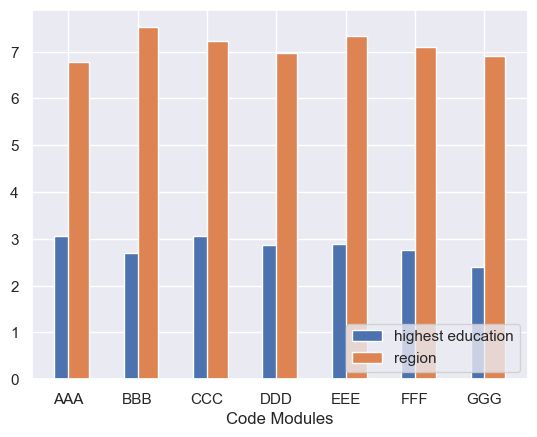

In [562]:
plt.bar(module_t.index,module_t['rank_he'],label='highest education',width=0.4 )
plt.bar(module_t.index,module_t['rank_region'],label= 'region',width=0.3,align='edge')
plt.legend(loc = 'lower right')
plt.xlabel('Code Modules')
plt.show()

<div dir="rtl" align="right">
הגרף מציג את ההבדלים בהרכבי הקורסים במועדים השונים. המספרים כמובן שלא מדוייקים כלל, מטרתם היא לבחון מה היחסים בין המודלים? לוודא שאין מודל אחד בעיקר עם סטודנטים בעלי השכלה בסיסית בלבד או מודל אליו הגיעו סטודנטים בעיקר מאזורים משכילים.

<div dir="rtl" align="right">
מה ניתן להסיק מהגרף?

    1. אין קורס בו הרכב הסטודנטים שלמדו היה חריג במיוחד. 
    2. תהינו מדוע אחוז התלמידים שהצליחו בקורס AAA היה גבוה במיוחד? ניתן לראות שכנראה ההצלחה לא נובעת מהרכב הלומדים. האיזורים מהם הגיעו התלמידים אליו הינם ממוצעים ומטה, וההשכלה של הסטודנטים אינה גבוה באופן משמעותי מאצל הסטודנטים בשאר הקורסים (ועוד, מודל CCC מכיל סטודנטים עם רמת השכלה דומה ובכל זאת הסטודנטים בו פחות הצליחו)
    3. מכאן נראה שהסיבה להצלחת הסטודנטים בקורס AAA היא המרצה המוכשר. (או חומר יותר מובן) 
    4. אם ניזכר, הבחנו שבאופן יחסי הסטודנטים בקורס EEE הצליחו באחוזים מעט יותר גדולים. גם נתון זה קשה להסביר בגלל הרכב הסטודנטים בכיתה.
    5. עוד הבחנו שהסטודנטים בקורס GGG עברו באחוזים מעט יותר נמוכים. את העובדה הזו כן ניתן לתלות בהרכב התלמידים. כפי שנראה זה המודול בו התלמידים היו הכי הרבה תלמידים עם רמת השכלה בסיסית.

---

<div dir="rtl" align="right">

# 7. מסקנות המחקר

<div dir="rtl" align="right">
<b>סיכום הניתוח</b>
<div dir="rtl" align="right">
רצינו לבחון האם מה מידת ההשפעה של המרצה על הצלחת התלמידים?
<div dir="rtl" align="right">
התחלנו בחישוב אחוזי ההצלחה בקורסים במודלים שונים וראינו שבאופן יחסי האחוזים דומים, למעט מודל אחד.
<div dir="rtl" align="right">
כן הבחנו שברמות קטנות כן יש קורסים בהם מעט יותר תלמידים הצליחו וקורסים בהם מעט יותר תלמידים נכשלו.
<div dir="rtl" align="right">
לחר מכן רצינו לבדוק אם ניתן לתלות את השינויים הללו בגורמים חיצוניים? ולכן בדקנו את מידת ההשפעה של מספר נתונים נוספים על הצלחת בקורסים. 
    <div dir="rtl" align="right">
חישבנו וראינו שלמין הסטודנטים ולתאריך בו הם נרשמו לקורס (הכוונה מספר הימים קודם תחילת הקורס שהם כבר תכננו מראש ונרשמו) לא היתה השפעה משמעותית על הצלחתם.
<div dir="rtl" align="right">
אך ראינו שרמת ההשכלה של הסטודנטים, ואזור המגורים שלהם כן השפיעו על אחוזי ההצלחה בקורסים.
    <div dir="rtl" align="right">
לאחר מכן בדקנו האם ניתן לתלות בנתונים אלו את ההבדלים באחוז הסטודנטים שעברו בקורסים במודלים השונים, וראינו שאי אפשר לתלות


<div dir="rtl" align="right">
<b>מסקנות</b>
<div dir="rtl" align="right">
נראה שככלל אין השפעה משמעותית של המרצה והקורס על הצלחת התלמידים המשתתפים בו. ואם כן יוצא שמידת ההצלחה תלויה בתלמידים עצמם!! . 
<div dir="rtl" align="right">
אמנם, נראה שיש מרצים מיוחדים שמצליחים להביא את התלמידים שלהם להשגים גבוהים יותר! לדוגמא המרצה של קורס AAA. 
    <div dir="rtl" align="right">
על כן, נראה שמומלץ לשמוע ממנו אם יש לו שיטות לימוד מיוחדות ולהציע לשאר המרצים לאמץ אותם. 
        <div dir="rtl" align="right">
(אם כי זה לא ודאי, ייתכן שההצלחה בקורס הזה נובעת מכך שהחומר בו יותר קל ואינה קשורה למרצה)